# Анализируем данные

In [1]:
%pip install seaborn
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


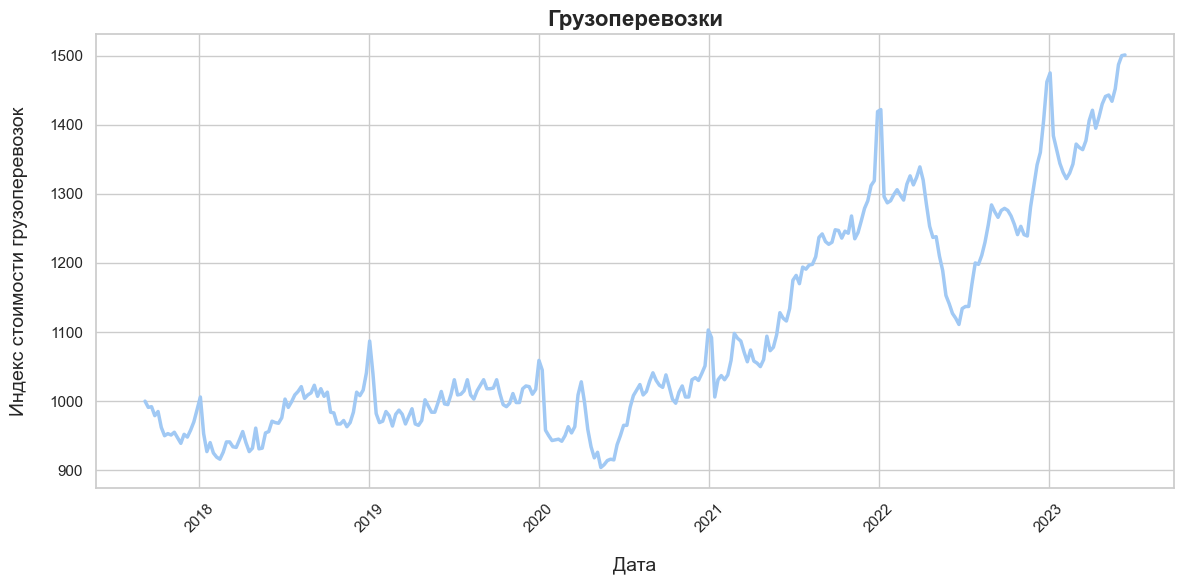

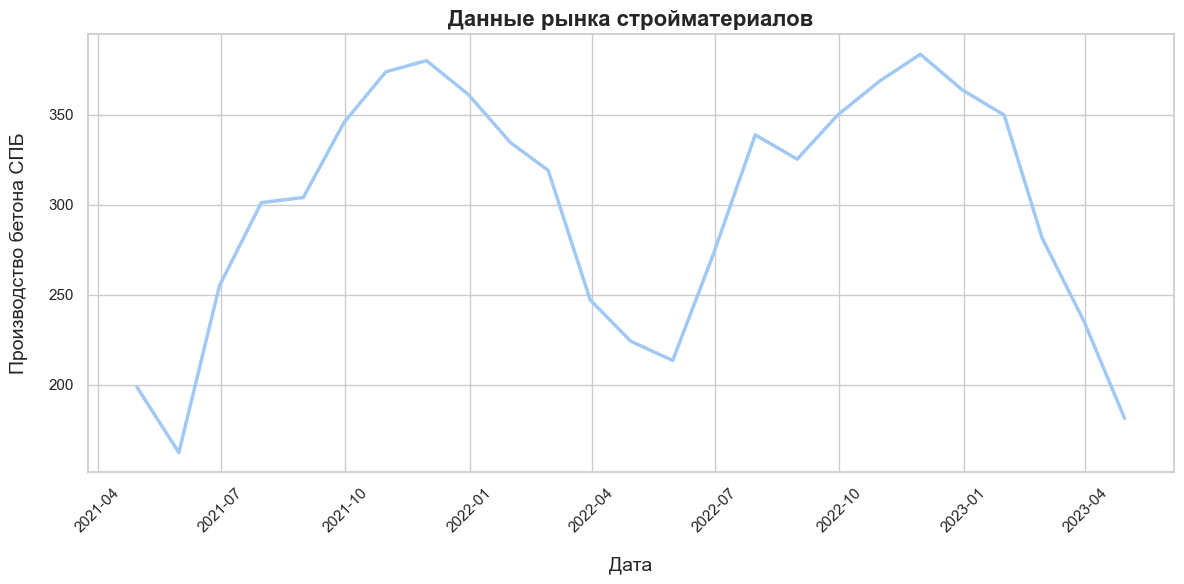

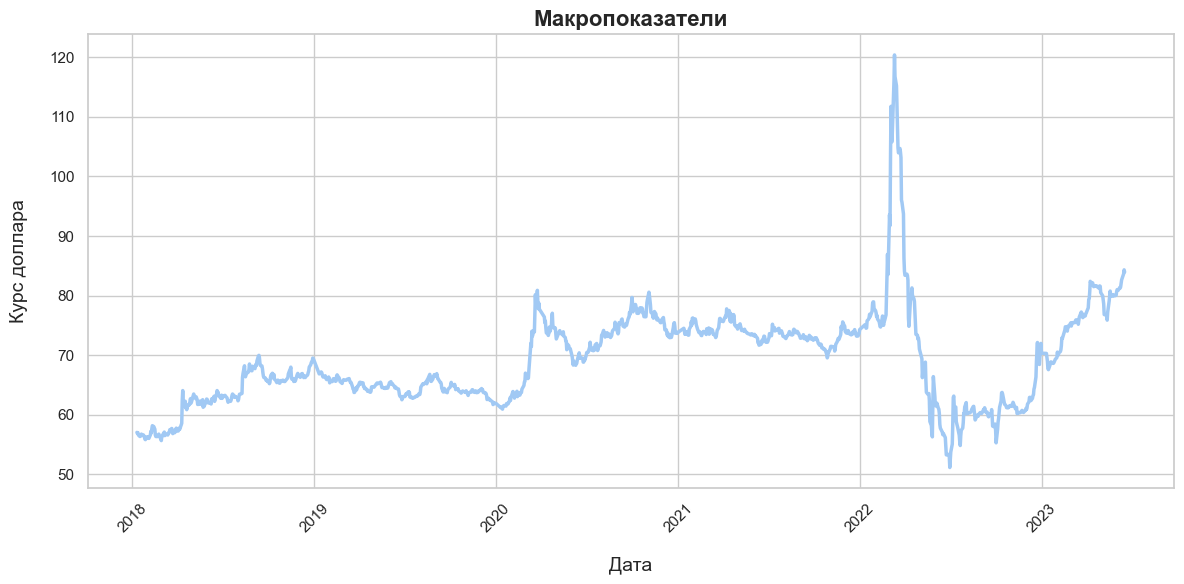

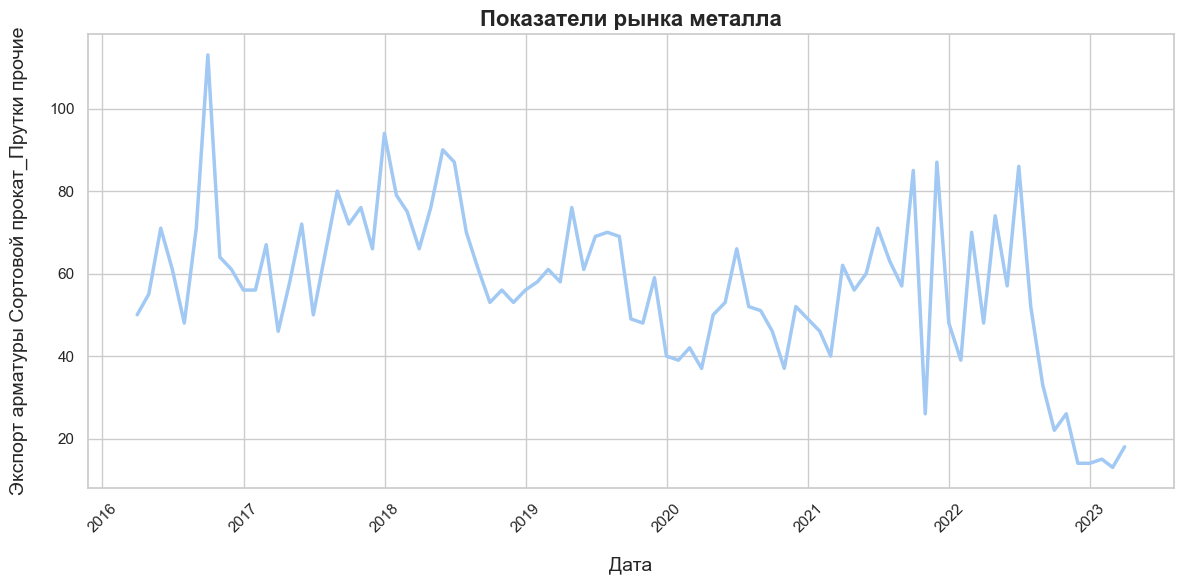

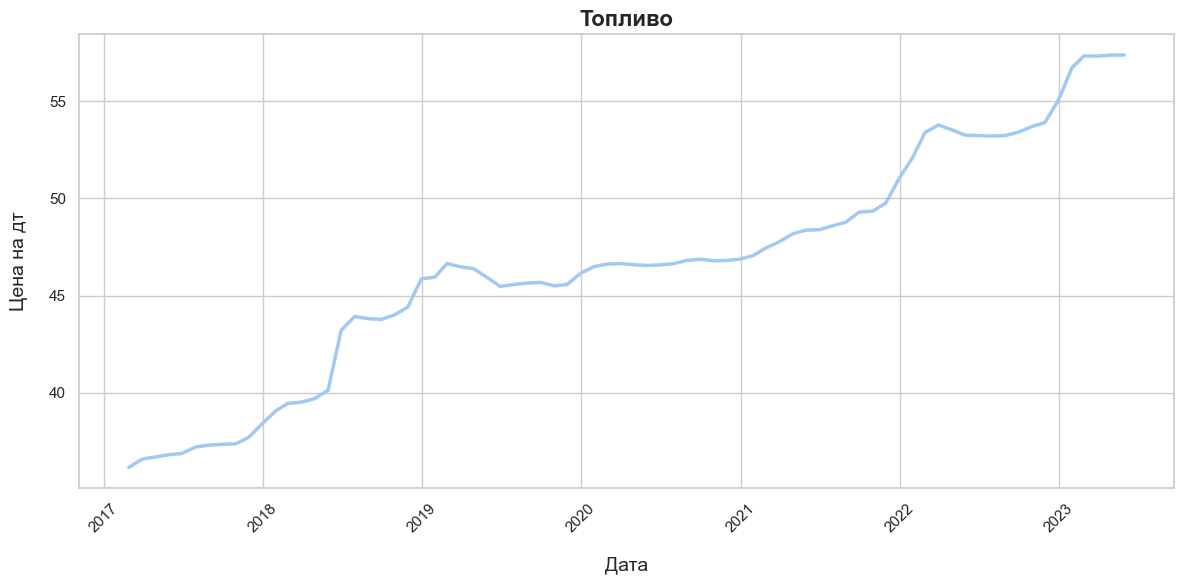

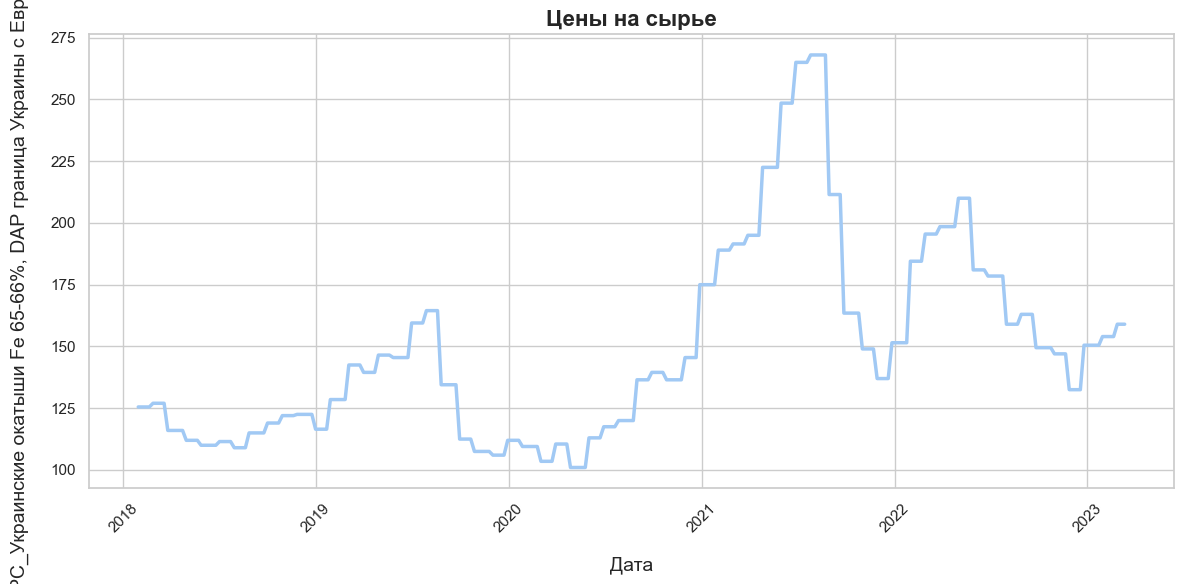

In [ ]:
sns.set(style="whitegrid")  # белая сетка
sns.set_palette("pastel")  # нежные цвета

p = Path("data/xlsx/")
for x in p.rglob("*"):
    df = pd.read_excel(x, index_col=0)
    
    # Создание графика
    plt.figure(figsize=(12, 6))  # размер графика
    sns.lineplot(x='dt', y=df.columns[-1], data=df, linewidth=2.5)
    
    # Настройки заголовка и меток
    plt.title(str(x)[10:-5], fontsize=16, fontweight='bold')
    plt.xlabel('Дата',labelpad=15, fontsize=14)
    plt.ylabel(df.columns[-1],labelpad=15, fontsize=14)
    plt.xticks(rotation=45)  # поворот меток по оси X
    plt.tight_layout()  # улучшение размещения элементов на графике
    
    plt.show()


In [ ]:
for x in p.rglob("*"):
    df = pd.read_excel(x, index_col=0)
    
    for column in df.columns[1:]:
        # Создание графика
        plt.figure(figsize=(12, 6))
        sns.lineplot(x='dt', y=column, data=df, linewidth=2.5)
        
        # Настройки заголовка и меток
        plt.title(f"{str(x)[10:-5]} - {column}", fontsize=16, fontweight='bold')
        plt.xlabel('Дата', labelpad=15, fontsize=14)
        plt.ylabel(column, labelpad=15, fontsize=14)
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        plt.show()

In [7]:
df = pd.read_excel("data/train.xlsx")

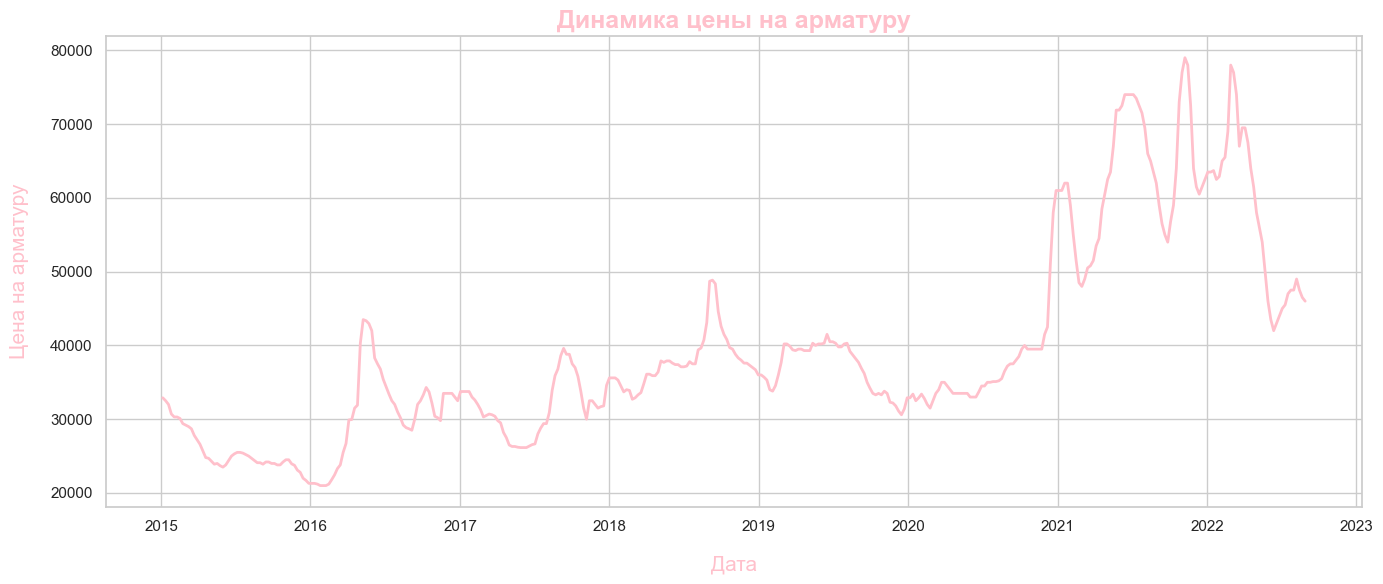

In [23]:
plt.figure(figsize=(14, 6), facecolor='white')

# Настройка цвета графика
sns.lineplot(x='dt', y=df.columns[-1], data=df, color='pink', linewidth=2)

# Метки осей
plt.xlabel('Дата',labelpad=15, fontsize=15,color='pink')
plt.ylabel('Цена на арматуру', labelpad=15, fontsize=15,color='pink')

# Заголовок графика
plt.title('Динамика цены на арматуру', fontsize=18, fontweight='bold',color='pink')

# Отображение графика
plt.tight_layout()
plt.show()


In [2]:
p = Path("data/xlsx/")
dfs = []
for x in p.rglob("*"):
    df = pd.read_excel(x)
    dfs.append(df)
dfs.append(pd.read_csv('data/train.csv'))
dfs.append(pd.read_csv('data/test.csv'))
df_merged = pd.concat(dfs, axis=0, ignore_index=False, sort=False)
df_merged['dt'] = pd.to_datetime(df_merged['dt'])
df_merged = df_merged.sort_values(by='dt')

In [3]:
df_merged['week'] = df_merged['dt'].dt.to_period('W')
df_merged = df_merged.groupby('week').agg('first').reset_index()
df_merged = df_merged.drop(columns='week')

In [4]:
df_merged = df_merged.dropna(subset=["Цена на арматуру"])

In [5]:
# Вычисляем долю пропущенных значений в каждом столбце
missing_percent = df_merged.isnull().mean()

# Определяем столбцы, где доля пропусков превышает 30%
columns_to_drop = missing_percent[missing_percent > 0.3].index

# Удаляем эти столбцы
df_cleaned = df_merged.drop(columns=columns_to_drop)


In [34]:
import numpy as np
df_cleaned.replace(["nan", np.float64(0.0), np.float64(1.0)], np.nan, inplace=True)

In [26]:
numeric_cols = df_cleaned.select_dtypes("float64").columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].interpolate(method="linear").fillna(method="ffill")

/var/folders/90/pj6yt0sd06b04mcq4xjmcl2h0000gn/T/ipykernel_10460/2041183689.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned[numeric_cols] = df_cleaned[numeric_cols].interpolate(method="linear").fillna(method="ffill")


In [9]:
df_cleaned = df_cleaned.interpolate(method='linear')  # Линейная интерполяция


In [20]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368 entries, 0 to 426
Columns: 160 entries, dt to Цена на арматуру
dtypes: datetime64[ns](1), float64(159)
memory usage: 462.9 KB


In [30]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368 entries, 0 to 426
Data columns (total 40 columns):
 #   Column                                                                                            Non-Null Count  Dtype         
---  ------                                                                                            --------------  -----         
 0   dt                                                                                                368 non-null    datetime64[ns]
 1   Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС                                  364 non-null    float64       
 2   Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т                                                          364 non-null    float64       
 3   Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС                                                      364 non-null    float64       
 4   Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС                                           

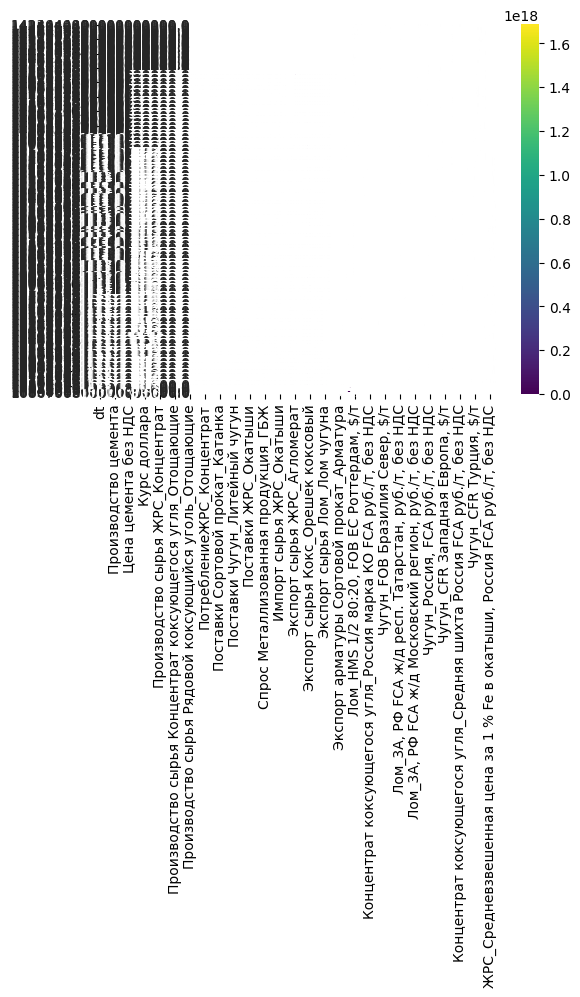

In [63]:
df_merged['dt'] = pd.to_numeric(df_merged['dt'])
sns.heatmap(df_merged, annot=True, fmt=".1f", cmap="viridis")
df_merged['dt'] = pd.to_datetime(df_merged['dt'])

In [7]:
%pip install missingno
import missingno as msno



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


<Axes: >

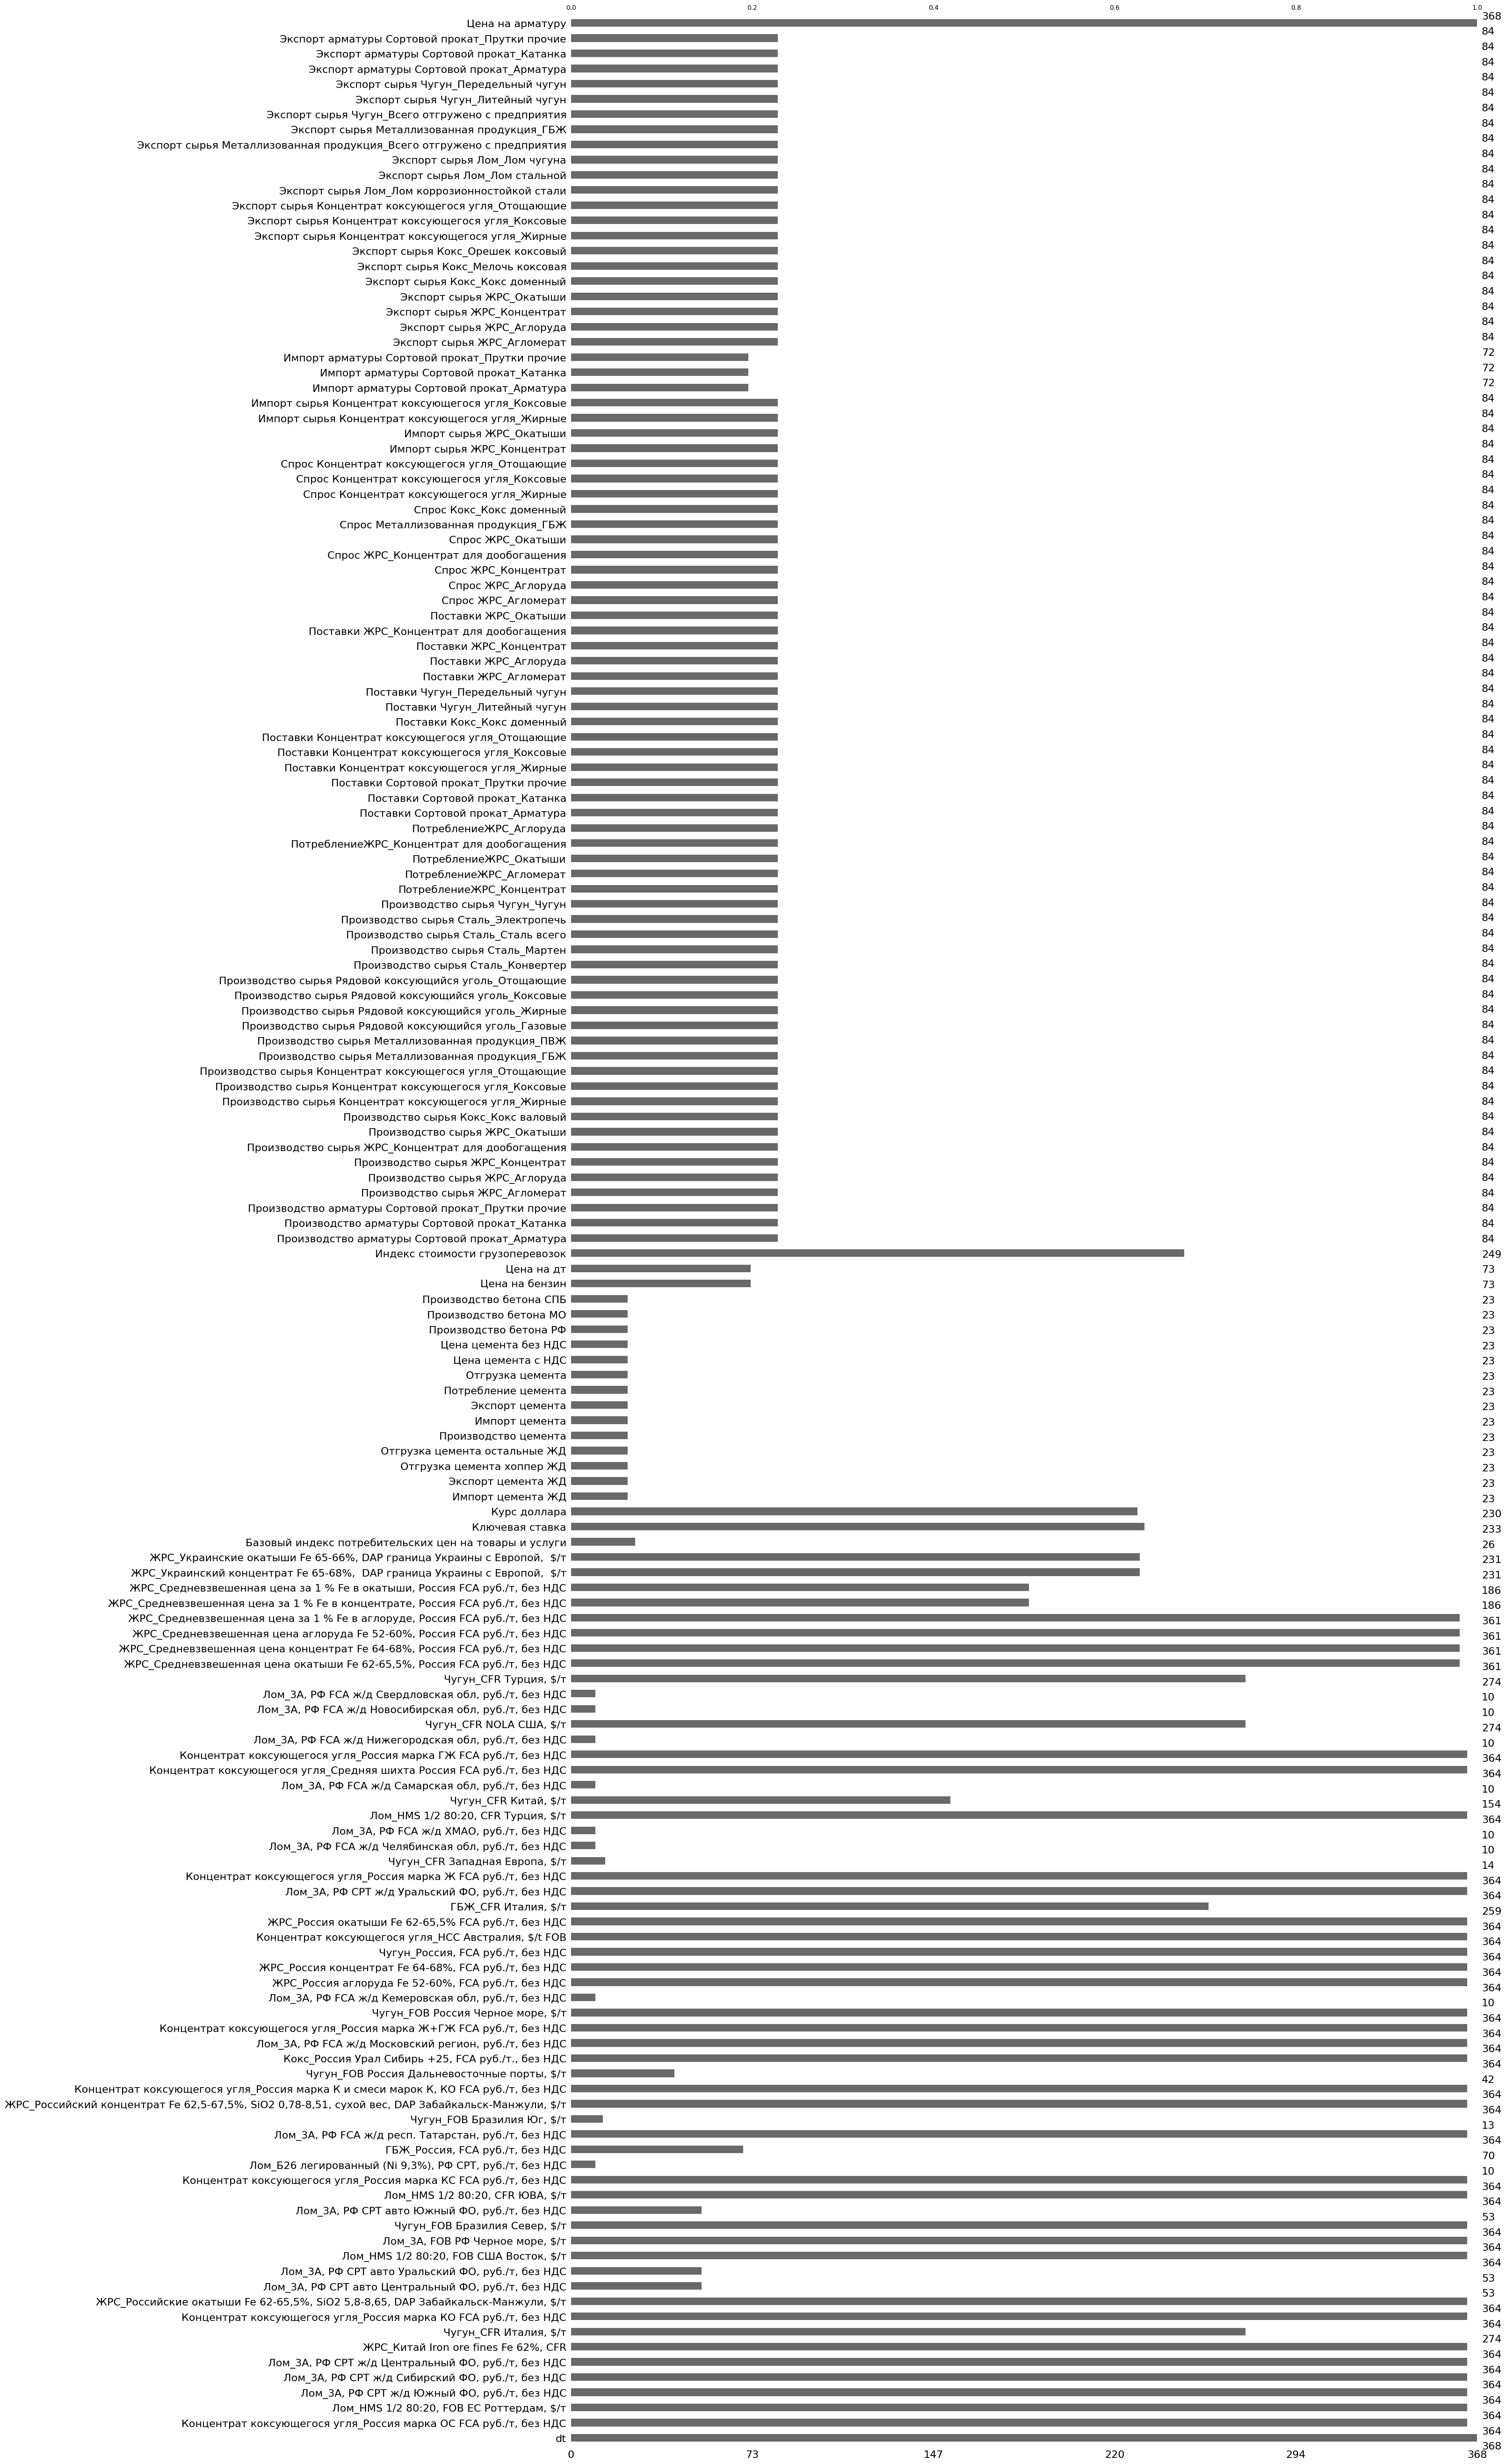

In [12]:

msno.bar(df_merged)

<Axes: >

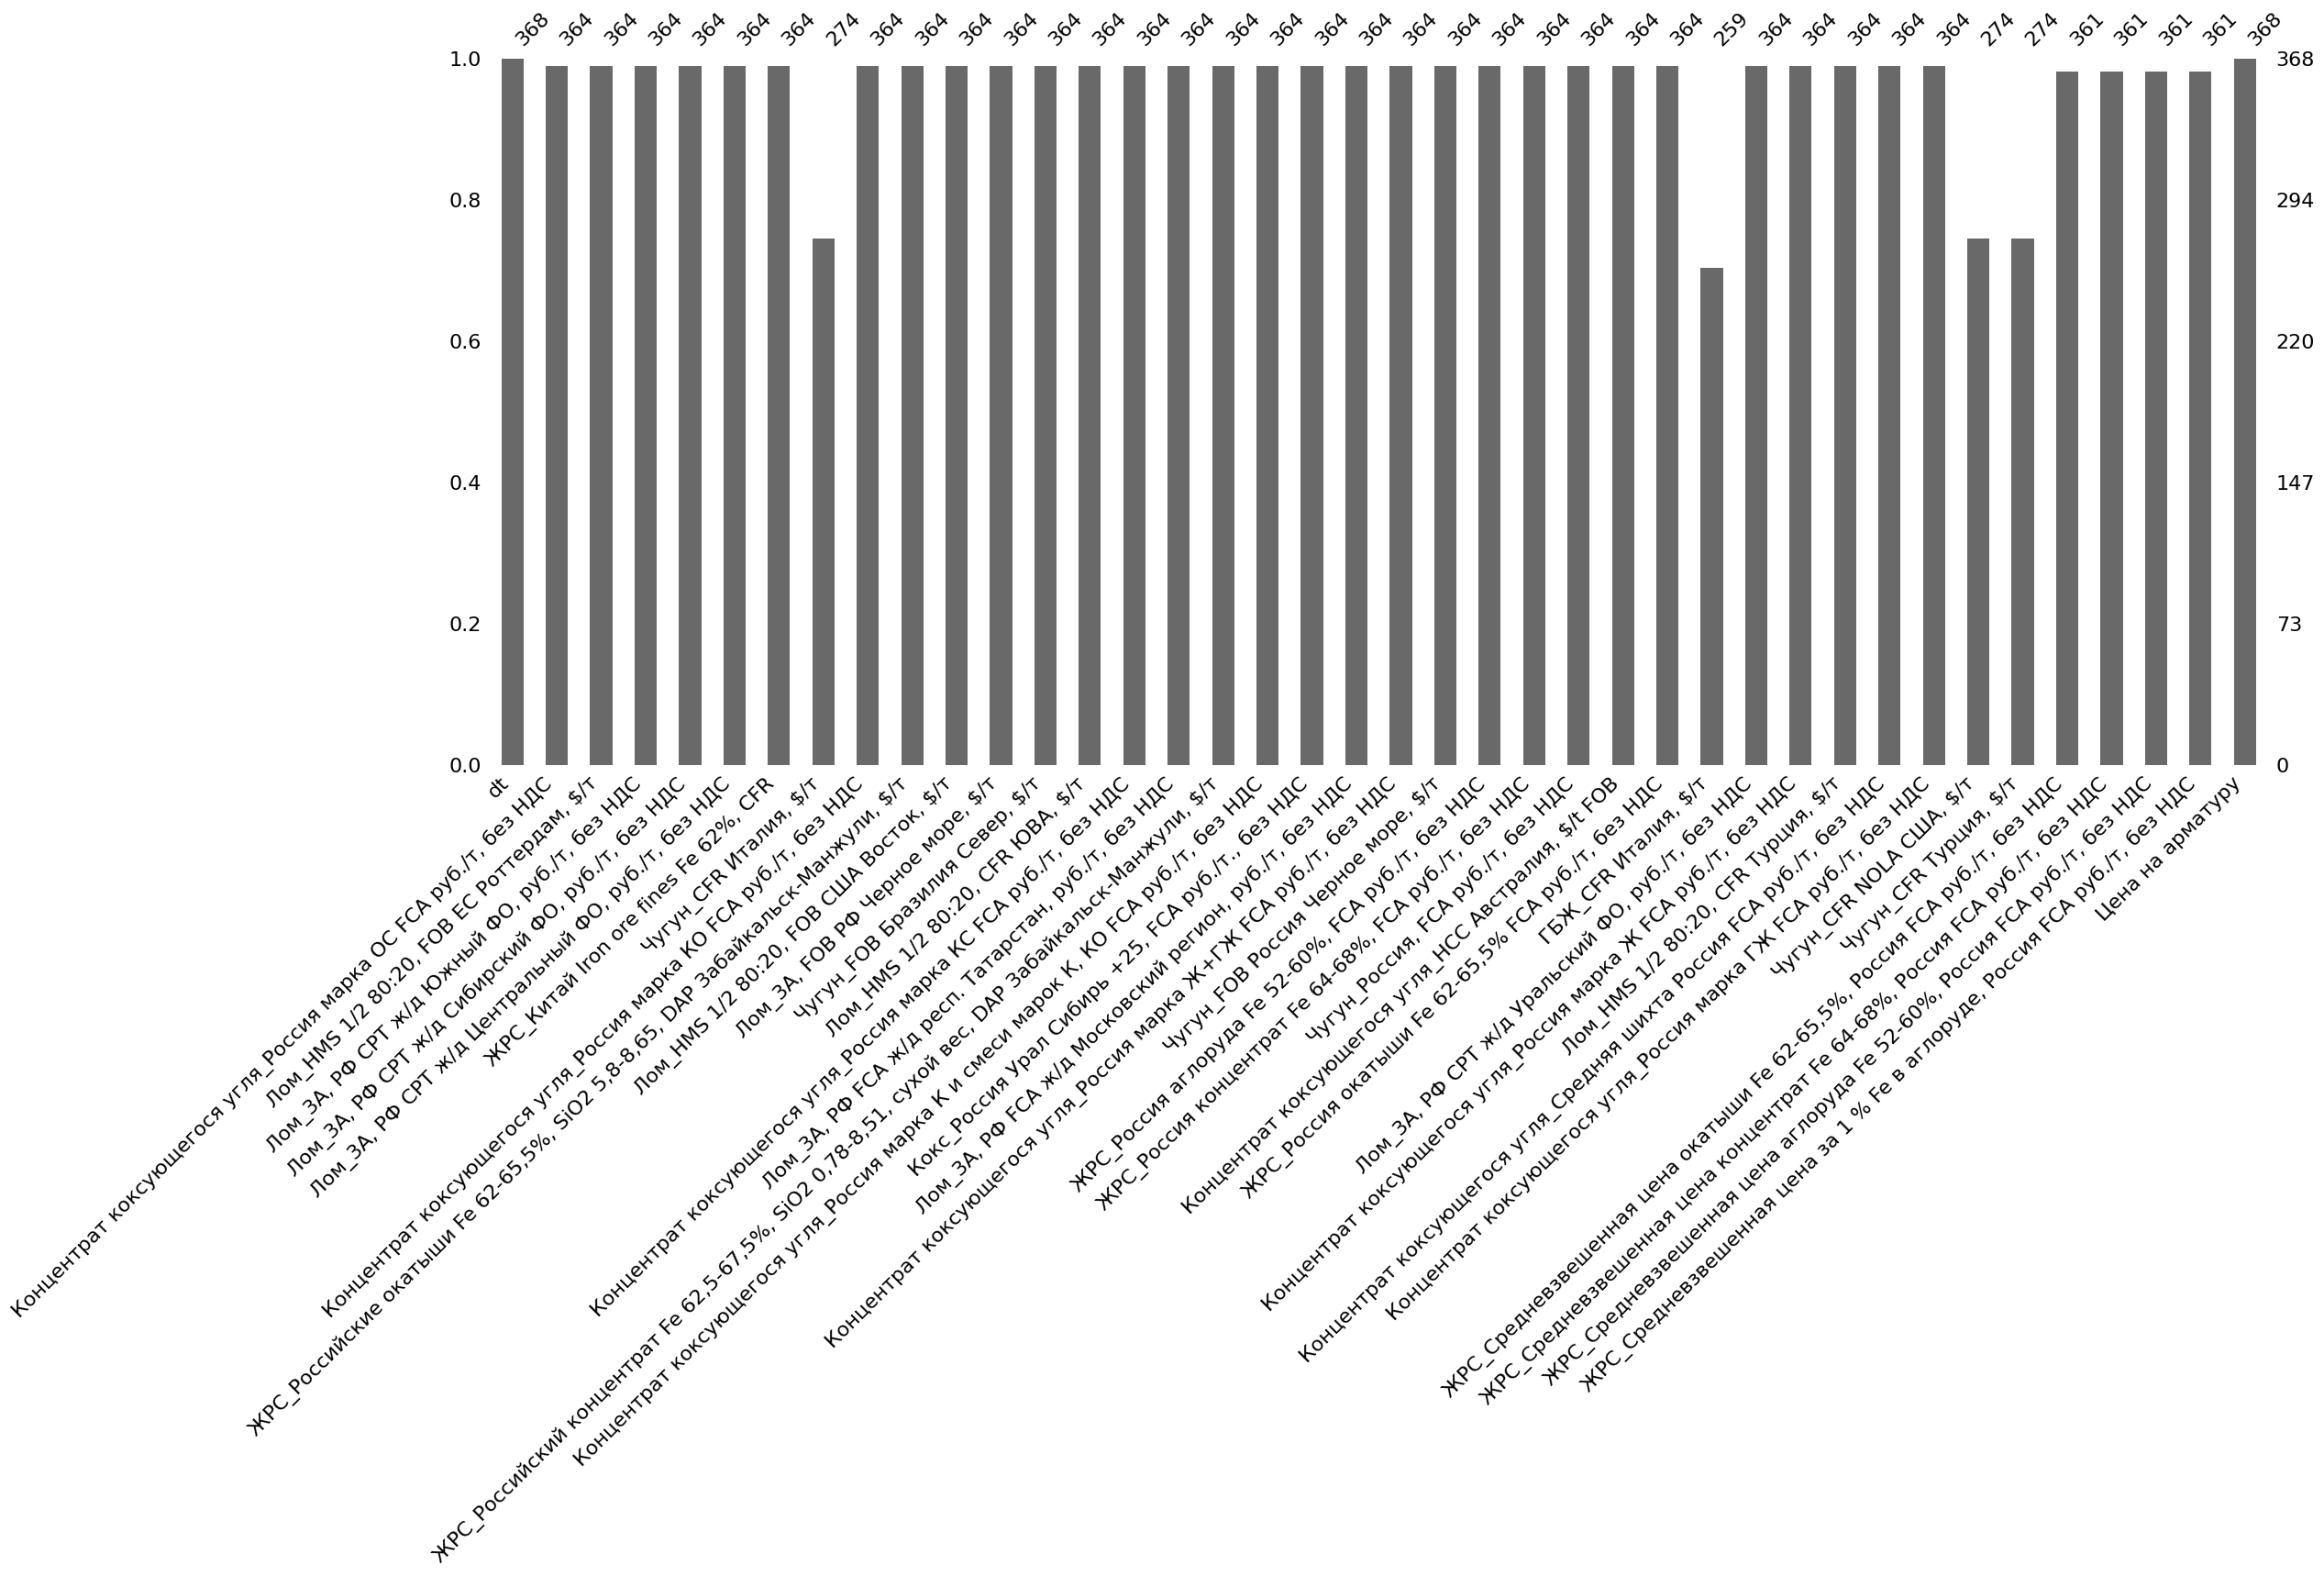

In [10]:
msno.bar(df_cleaned)

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



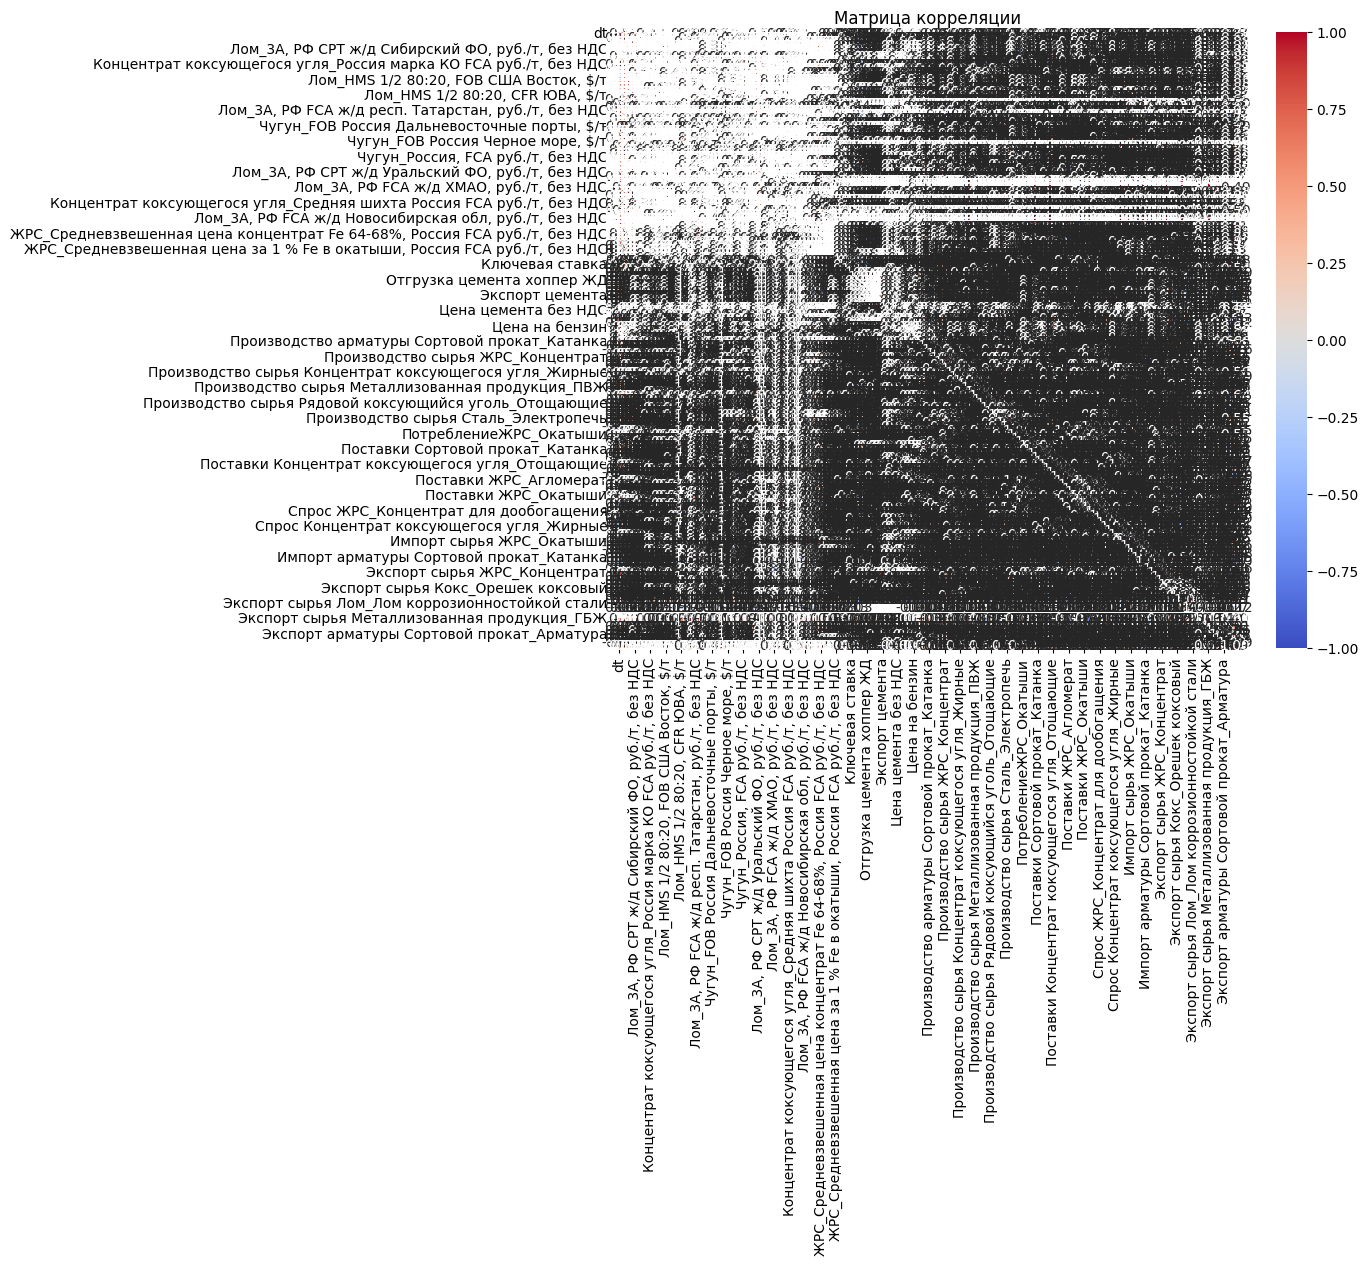

In [14]:


# Вычисляем матрицу корреляции
correlation_matrix = df_merged.corr()


# Визуализация матрицы корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Матрица корреляции")
plt.show()

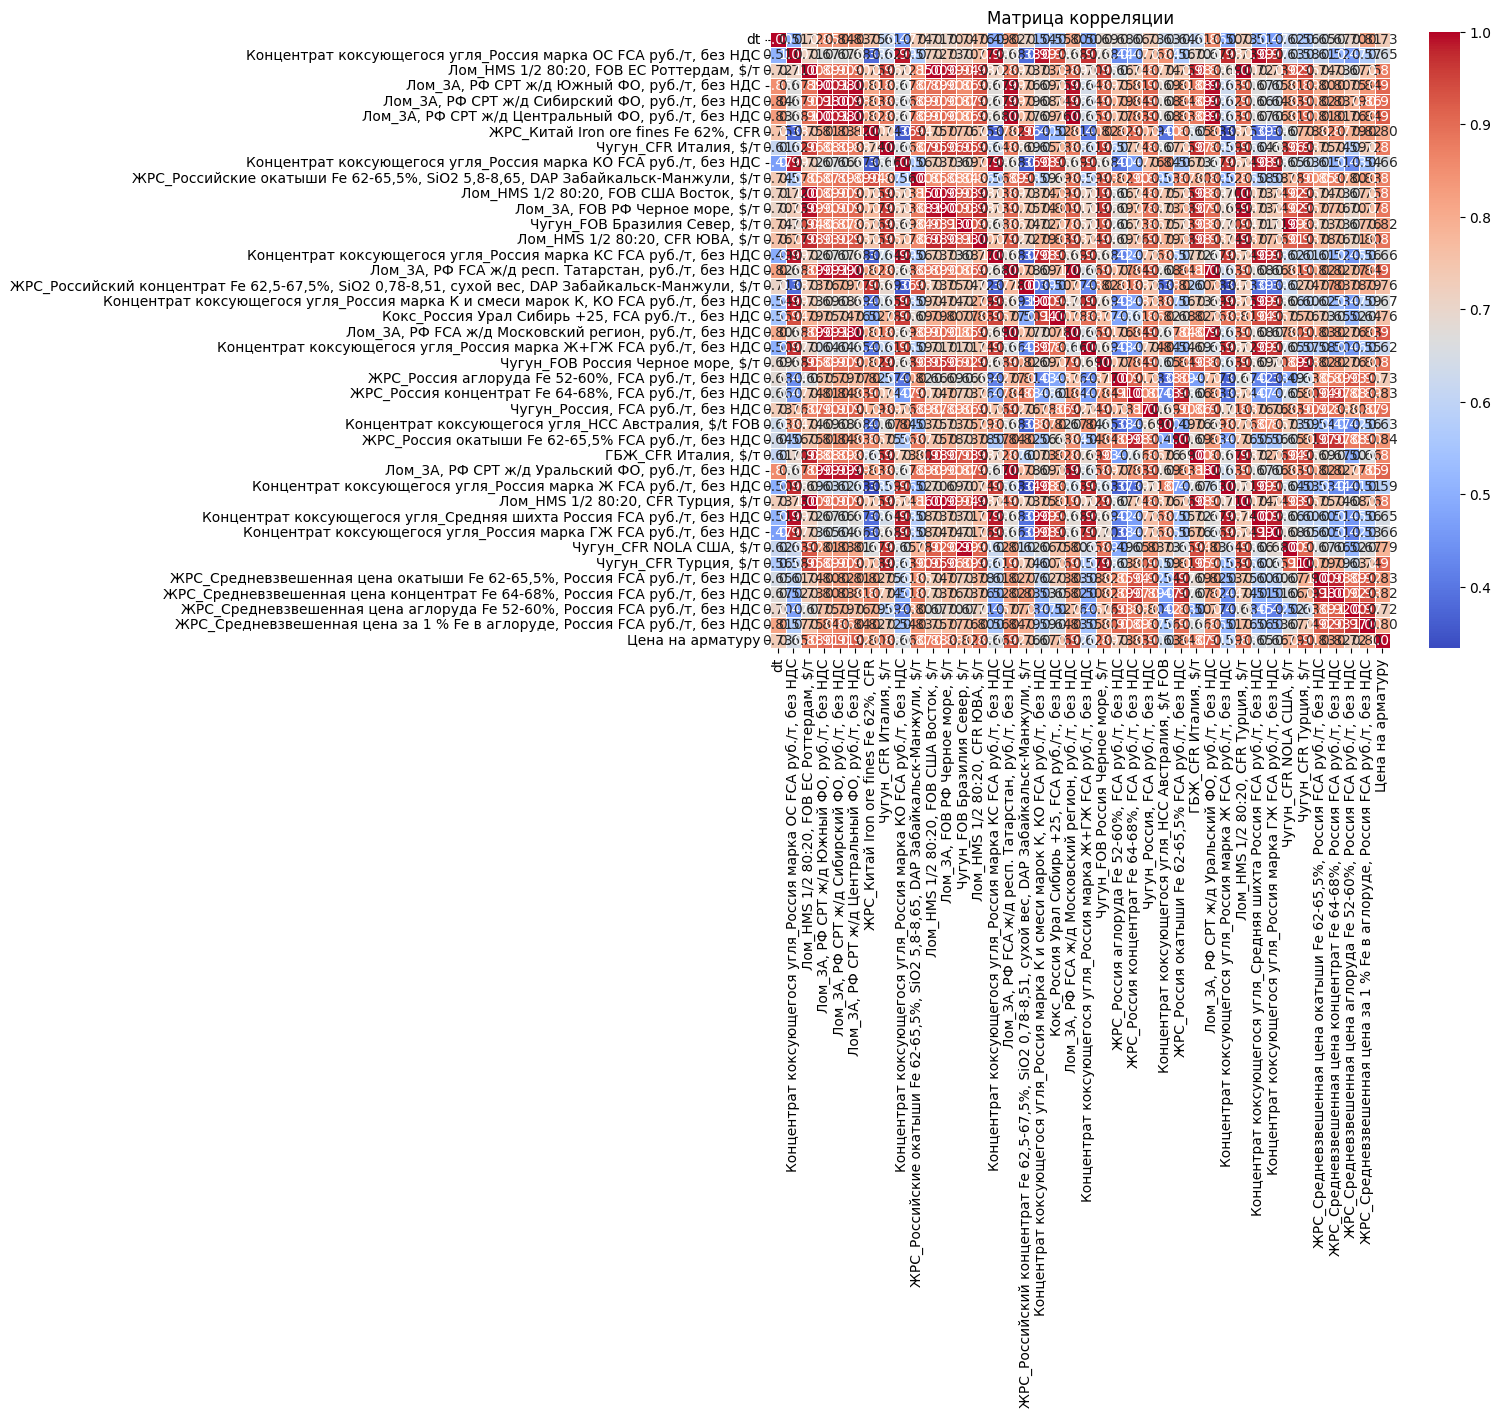

In [23]:

# Вычисляем матрицу корреляции
correlation_matrix = df_cleaned.corr()


# Визуализация матрицы корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Матрица корреляции")
plt.show()